In [77]:
import numpy as np
import pandas as pd
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('./Crop_recommendation.csv')
data.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [2]:
for i in data.duplicated():
    if i == True:
        print('duplicated')

In [3]:
#checing for null values

data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [88]:
data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2200 non-null   float64
 1   humidity     2200 non-null   float64
 2   label        2200 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 43.1 KB


,temperature,humidity,label
0,20.879744,82.002744,20
1,21.770462,80.319644,20
2,23.004459,82.320763,20
3,26.491096,80.158363,20
4,20.130175,81.604873,20


In [83]:
data.describe()

,temperature,humidity
count,2200.000000,2200.000000
mean,25.616244,71.481779
std,5.063749,22.263812
min,8.825675,14.258040
25%,22.769375,60.261953
50%,25.598693,80.473146
75%,28.561654,89.948771
max,43.675493,99.981876


In [84]:
le = LabelEncoder()
data['label']= le.fit_transform(data['label'])
data.label.unique()
data.head()

,temperature,humidity,label
0,20.879744,82.002744,20
1,21.770462,80.319644,20
2,23.004459,82.320763,20
3,26.491096,80.158363,20
4,20.130175,81.604873,20


In [85]:
data.corr()

,temperature,humidity,label
temperature,1.000000,0.205320,0.113606
humidity,0.205320,1.000000,0.193911
label,0.113606,0.193911,1.000000


In [86]:
features = ['temperature','humidity']

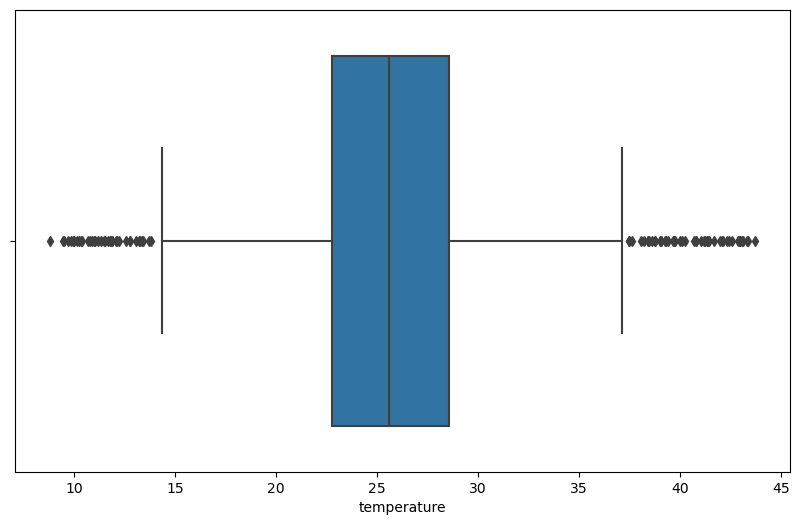

In [80]:
#temperature graph
plt.figure(figsize=(10,6))
sea.boxplot(x=data.temperature);

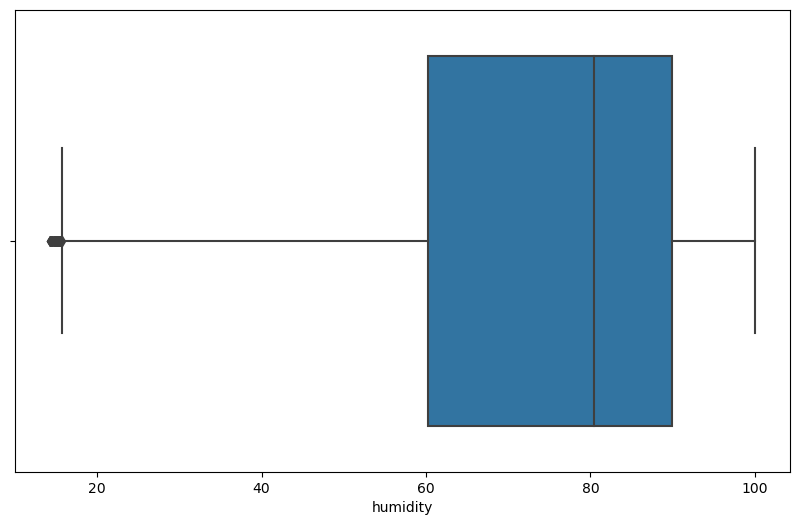

In [81]:
#humidity graph
plt.figure(figsize=(10,6))
sea.boxplot(x=data.humidity);

In [9]:
#defining features and target variable
X = data[features]
y = data['label']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# 1) Train a RandomForestRegressor model

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [29]:
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 2.9272727272727272


In [30]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 34.5


In [31]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: 0.18485812208602226


In [47]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6227272727272727


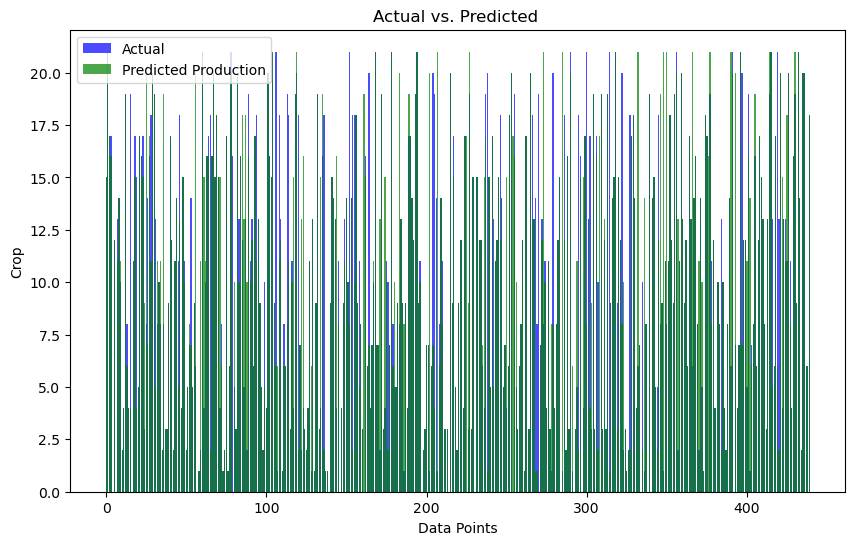

In [43]:
import matplotlib.pyplot as plt

# Plotting the actual vs. predicted crop
plt.figure(figsize=(10, 6))

# Plot actual production
plt.bar(range(len(y_test)), y_test, color='blue', alpha=0.7, label='Actual')

# Plot predicted production
plt.bar(range(len(predictions)), predictions, color='green', alpha=0.7, label='Predicted Production')

plt.xlabel('Data Points')
plt.ylabel('Crop')
plt.title('Actual vs. Predicted ')
plt.legend()
plt.show()


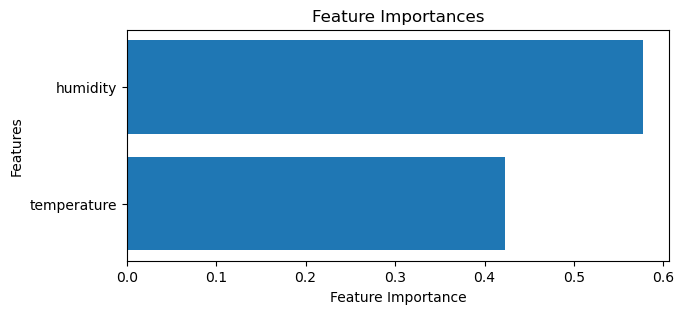

In [45]:
# Visualize feature importances
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(7, 3))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [69]:
#2) Logistic regression

model = LogisticRegression(max_iter=50000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=50000)

In [70]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [71]:
# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 4.413636363636364


In [73]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 52.74545454545454


In [74]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

R-squared: -0.2462327208582078


In [75]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.45681818181818185


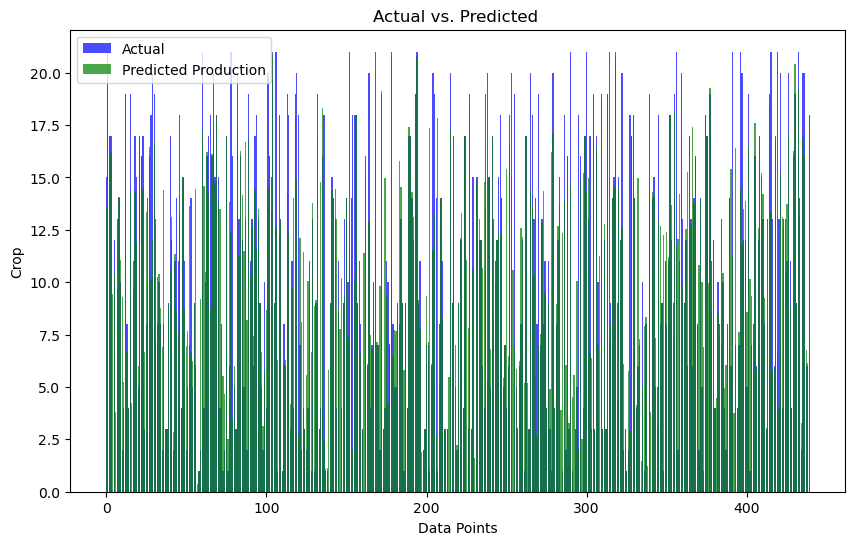

In [124]:
import matplotlib.pyplot as plt

# Plotting the actual vs. predicted crop
plt.figure(figsize=(10, 6))

# Plot actual production
plt.bar(range(len(y_test)), y_test, color='blue', alpha=0.7, label='Actual')

# Plot predicted production
plt.bar(range(len(predictions)), predictions, color='green', alpha=0.7, label='Predicted Production')

plt.xlabel('Data Points')
plt.ylabel('Crop')
plt.title('Actual vs. Predicted ')
plt.legend()
plt.show()


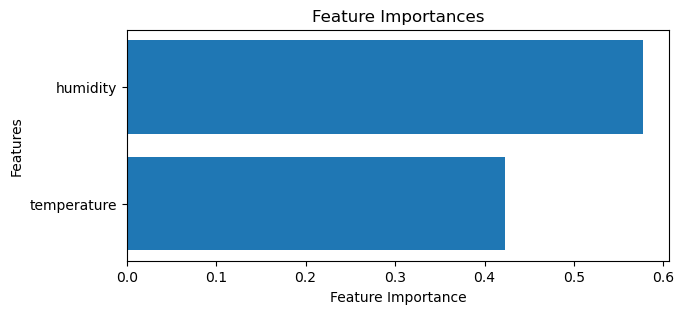

In [125]:
# Visualize feature importances
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(7, 3))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()